# Numerical Methods for Computing Eigenvalues

### Matrix Similarity

The first concept we will need to understand (if you don't already) is the concept of matrix similarity.
When we say two matrices $A$ and $B$ are similar matrices it means that they have a very particular relationship.

If an invertibe matrix $X$ exits such that the following relationship exists between $A_{n \times n}$ and $B_{n \times n}$ then $A$ and $B$ are *similar* matrices.

$A = X^{-1} B X$

If two matrices are similar they will share many of the same properties:

- Rank
- Determinant
- Trace
- ***Eigenvalues (MOST IMPORTANTLY)***
- etc... (There are many more, see sources)

Because similar matrices will share the same eigenvalues we can exploit the concept of matrix similarity to compute the eigenvalues of a matrix.

So how do we go about finding some matrix $X$ or check if $A_{n \times n}$ and $B_{n \times n}$ are similar?

### Schur Decomposition

In order for us to leverage the knowledge of matrix similarity to compute eigenvalues we'll need to use the Schur matrix decomposition, using the $QR$ decomposition.

Let's begin with the $QR$ decomposition...

$A = QR$

With $Q$ being an orthonormal matrix  recall that $Q^T Q = Q Q^T = I$, so $Q^T=Q^{-1}$.

Let's then say $B = RQ$. From this we can play quite an clever trick with our $QR$ decomposition of $A$ and the porperties of orthonormal matrices.

$B = RQ$

$IB = IRQ$ 

$B = Q^{T}QRQ$

$B = Q^{-1}QRQ$ (Remember $A = QR$)

$B = Q^{-1}AQ$ (This is the Schur Decomposition)

So with this we can say $B$ and $A$ are similar matrices. Further, by examining how we get the Schur decomposition we can see a way of producing an similar matrix for $A$ provided that we can perform a $QR$ decomposition for $A$.
That is that we can just compute $RQ$ and we will have a similar matrix.

To show or check that two similar matrices have the same eigenvalues, below we'll use `np.linalg.eig()` and `np.linalg.qr()` to confirm that $A$ and $B$ have the same eigenvalues.

In [25]:
import numpy as np

A = np.array(np.random.randint (0, 100, (3, 3)), dtype=np.float64)
print(f"A:\n {A}")
A_eigvals, A_eigvecs = np.linalg.eig(A)
print(f"Eigenvalues for A: \n {A_eigvals}")

Q, R = np.linalg.qr(A)
B = np.dot(R, Q)
print(f"RQ = B: \n {B}")
B_eigvals, B_eigvecs = np.linalg.eig(B)
print(f"Eigenvalues for B: \n {B_eigvals}")

A:
 [[44. 12. 61.]
 [94. 80. 26.]
 [76. 62.  9.]]
Eigenvalues for A: 
 [149.49147857 -26.75672795  10.26524939]
RQ = B: 
 [[143.17524776 -82.02127042  34.66647877]
 [-10.9111755    0.63783827  51.77375492]
 [  8.04904861   1.97549379 -10.81308604]]
Eigenvalues for B: 
 [149.49147857 -26.75672795  10.26524939]


As you can clearly see the eigenvalues are the same for both $A$ and $B$.

### The Rayleigh Quotient

The following is defined as the Rayleigh Quotient.

$r(\vec{x}, A) \equiv
  \begin{cases}
    \frac{\langle x \mid Ax \rangle} {\langle x \mid x \rangle} & \quad \text{}\\
    \frac{\vec{x}^* A \vec{x}} {\vec{x}^* \vec{x}} & \quad \text{Complex}\\
    \frac{\vec{x}^T A \vec{x}} {\vec{x}^T \vec{x}} & \quad \text{Real}
  \end{cases}
$

In the case of where $\vec{x}$ is an eigenvector $(\vec{v})$ of $A$, then the Rayeligh quotient will procude compute the corresponding eigenvalue for the eigenpair. Of course this will be useful in computing $\lambda$s.

$r(\vec{v}) = \lambda$

The mathematical analysis to show this is beyond the scope of the focus of computing eigenvalues. If interested though for the sake of simplicity it's best to consider that $A$ is a strictly real and symmetric matrix, or if you want to consider the complex case assume $A$ is Hermitian to show this. However, this general idea behind the Rayleigh Quotiet can be applied to the complex non-Hermitian case, or in our case the real non-symmetric case. This can be seen in the code below using the same randomly generated $A$ from above and the computed eigenvalues and eigenvectors.

In [26]:
print(f"A: \n{A}")
print(f"Eigenvalues for A:\n {A_eigvals}")
print(f"Eigenvectors for A:\n {A_eigvecs}")
# Eigenvectors from np.linalg.eig() comes in a form of a matrix which needs
# to be transposed get at the eigenvectors in a loop

def rquotient(vec, A):
    top = np.dot(vec.T, np.dot(A, vec))
    bottom = np.dot(vec.T, vec)
    return top / bottom

for num, i in enumerate(A_eigvecs.T):
    eigval = rquotient(i, A)
    print(f"Eigenvalue {num + 1}: {eigval}")

A: 
[[44. 12. 61.]
 [94. 80. 26.]
 [76. 62.  9.]]
Eigenvalues for A:
 [149.49147857 -26.75672795  10.26524939]
Eigenvectors for A:
 [[-0.39755815 -0.63646445  0.61843026]
 [-0.74050254  0.39976377 -0.76199621]
 [-0.54185192  0.65962257 -0.19210879]]
Eigenvalue 1: 149.49147856748235
Eigenvalue 2: -26.75672795313828
Eigenvalue 3: 10.265249385655858


As you can see from the output above passing each eigenvector into the Rayleigh Quotient function `rquotient` returns the expected eigenvalues for $A$ as computed before with `np.linalg.eig()`. This is what we can consider a baby method for computing $\lambda$s. In reality the rayleigh quotient will be used, but as a part of more elaborate methods.

### Computing $\lambda$'s with $QR$

The first method of computing $\lambda$'s comes uses our knowledge of $QR$, matrix similarity, and how to get a similar matrix through the Schur Decomposition.

We will start by computing a $QR$ decomposition for some matrix $A_0$ that can be decomposed with $QR$.

$A_0 = Q_0 R_0$

Then we will compute a similar matrix to $A_0$ using our $Q_0$ and $R_0$ matrices and call this new similar matrix $A_1$.

$A_1 = R_0 Q_0$

From this point the process will be repeated for $A_1$ (decompose into $Q_1 R_1$) to compute another new similar matrix $A_2$. We will continue through this process iteratively until we compute $A_n$ similar matrices.

$A_1 = Q_1 R_1$

$A_2 = R_1 Q_1$

$\vdots$

$A_n = Q_n R_n$

$A_{n+1} = R_n Q_n$

What will happen throughout this process each similar matrix computed will get closer and closer, and ultimately converge to an upper triangular matrix (or at least in the numerical world, one with incredibly small values denoted as $\epsilon$'s we can round to zero below the diagonal). Conveniently the $\lambda$s will be on the diagonal.

$A_n = 
 \begin{pmatrix}
  \lambda_1 & a_{1,2} & \cdots & a_{1,m} \\
  \epsilon & \lambda_2 & \cdots & a_{2,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & \lambda_m
 \end{pmatrix}$
 
 We put this into action with the following code for the same randomly generate $A$ matrix previously.

In [27]:
def makesimilar(A):
    Q, R = np.linalg.qr(A)
    B = np.dot(R, Q)
    return B

def eig_qr(A):
    B = makesimilar(A)
    iters = 0
    leig = B[-1, -1]
    diff = 1
    while diff > 1e-32:
        B = makesimilar(B)
        iters += 1
        diff = abs(leig - B[-1, -1])
        leig = B[-1, -1]
    print(f"A_{iters} = \n{B}")
    eigs = [B[i, i] for i in range(len(B))]
    return eigs, iters

eigs, iters = eig_qr(A)
print(f"A:\n {A}")
print(f"Eignevalues: {eigs}")
print(f"# of iterations: {iters}")

A_42 = 
[[ 1.49491479e+02 -7.70154185e+01 -6.66314401e+00]
 [-7.62838420e-31 -2.67567280e+01  4.76364128e+01]
 [ 2.51713936e-48  9.92303419e-17  1.02652494e+01]]
A:
 [[44. 12. 61.]
 [94. 80. 26.]
 [76. 62.  9.]]
Eignevalues: [149.49147856748243, -26.756727953138228, 10.265249385655883]
# of iterations: 42


As you can hopefully see we get the same $\lambda$s as before when using `numpy.linalg.eig()`. In `eig_qr()` we are computing similar matrices in the process of the QR algorithm until we reach a difference in values along the diagonal of the $n$th and $n - 1$ $A_n$'s on order of $10^{-32}$ (see the while loop).

### Computing $\lambda$'s with $QR$ + Shifts

While computing $\lambda'$s with $QR$ worked well, it took 89 iterations of computing similar matrices to converge to the point where the computer rounded the last value of the first column to zero. While we could lower our standards and compute less iterations, there is a faster way to converge to an upper triangular matrix and precision in out $\lambda'$s with less iterations. That method is introducing shifts into the $QR$ method.


There are 2 possible ways to start this method:

1. Compute a QR decomposition with no shifts initially

$A_0 = Q_0 R_0$

$A_1 = R_0 Q_0$ (Like before)

OR

2. Shift A and then compute a QR decomposition for the shifted matrix for some value $s$

$A_0 - sI = Q_0 R_0$

Then reintroduce the shift when computing the similar matrix.

$A_1 = R_0 Q_0 + sI$


Either way for each subsequent similar matrix computation $(n >= 1)$ we'll use the 2nd method.

$A_n - sI = Q_n R_n$

$A_{n+1} = R_n Q_n + sI$

But how do we choose a value for $s$? Should we even choose one at all or just use a random value?

While you could use a random value it is unlikely to give too much of an efficiency improvement.

To use this shifting method and see improved efficiency, we'll want to choose a value close to a $\lambda$ or better yet use the **Rayleigh Quotient**. The motivation for this comes from a different, in my opinion, worse method to compute $\lambda$s discussed later on, but the general idea is that we want to pick a value for $s$ close to a $\lambda$.

If we think about computing $\lambda$s without shifts, each iteration of computing a similar $A_n$ matrix converges to an upper triangular matrix (roughly) with better approximations of the $\lambda$s along the diagonal with each iteration. This means that the last value of each similar matrix $A_{m,m}$ is getting closer to an actual $\lambda$ with each iteration. So with that in mind, we should choose a value along the diagonal of our similar matrix when starting each new iteration to be our shift $s$. We do that in the below code for the last value along the diagonal.

$A_n = 
 \begin{pmatrix}
  \lambda_1 & a_{1,2} & \cdots & a_{1,m} \\
  \epsilon & \lambda_2 & \cdots & a_{2,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & s
 \end{pmatrix}_{m \times m}$

In [28]:
def eig_qrshifts(A, refeig=-1, sindex=-1, verbose=True):
    B = makesimilar(A)
    n = 0
    leig = B[refeig, refeig]
    diff = 1
    while diff > 1e-32 and n < 100:
        shift = np.identity(len(B)) * B[sindex, sindex]
        C = B - shift
        B = makesimilar(C) + shift
        n += 1
        diff = abs(leig - B[refeig, refeig])
        leig = B[refeig, refeig]
    if verbose is True:
        print(f"A_{n} = \n{B}")
    eigs = [B[i, i] for i in range(len(B))]
    return eigs, n

print(f"A:\n {A}")
m, n = A.shape

for i in range(0, n):
    print(f"Position: {i + 1}\n")
    eigs, iters = eig_qrshifts(A, refeig=i)
    print(f"Eignevalues: {eigs}")
    print(f"# of iterations: {iters}")

A:
 [[44. 12. 61.]
 [94. 80. 26.]
 [76. 62.  9.]]
Position: 1

A_22 = 
[[ 1.49491479e+02  6.48987676e+01  4.19990730e+01]
 [-5.77915850e-15  1.02652494e+01 -4.76364128e+01]
 [ 0.00000000e+00  0.00000000e+00 -2.67567280e+01]]
Eignevalues: [149.4914785674824, 10.265249385655856, -26.75672795313824]
# of iterations: 22
Position: 2

A_23 = 
[[ 1.49491479e+02 -6.48987676e+01 -4.19990730e+01]
 [ 1.21394639e-15  1.02652494e+01 -4.76364128e+01]
 [ 0.00000000e+00  0.00000000e+00 -2.67567280e+01]]
Eignevalues: [149.4914785674824, 10.265249385655856, -26.75672795313824]
# of iterations: 23
Position: 3

A_8 = 
[[ 1.49491487e+02 -6.48987499e+01  4.19990669e+01]
 [ 1.77490861e-05  1.02652411e+01  4.76364181e+01]
 [-2.12711673e-67 -8.32848222e-62 -2.67567280e+01]]
Eignevalues: [149.49148684101993, 10.265241112118325, -26.75672795313824]
# of iterations: 8


What we see in the above output for computing $\lambda$s with the QR algorithm with shifts is that we are computing less similar matrices (doing less iterations) compared to just the QR algorithm. Also above, by using the `refeig` kwarg of `eig_qrshifts()` we can change the value along the diagonal we are using as our reference for comparing values with each iteration until we reach a difference between iterations of $<10^{-32}$. From using this we can see in the output that when we choose the shift to be the last value along the diagonal, setting the reference to the same last position along the diagonal converges to a precision on order of $<10^{-32}$ the fastest in only 8 iterations.

If the idea about choosing the shift to be the last value along the diagonal works well because with each iteration the values along the diagonal converge to be the $\lambda$s, then couldn't we choose any value along the diagonal to be the shift $(s)$? The below code shows that choosing just any value along the diagonal as the shift doesn't work by iterating through the `refeig` and `sindex` (the shift index) kwargs of `eig_qrshifts()` keeping track of the number of iterations, stopping at 100 max iterations.

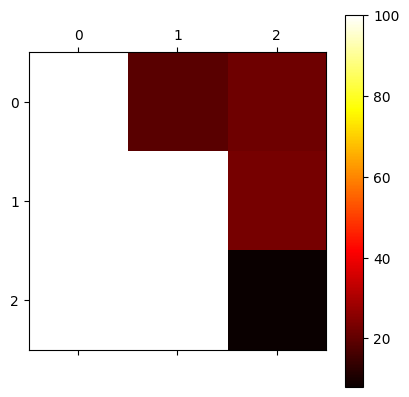

In [29]:
import matplotlib.pyplot as plt

m, n = A.shape
miters = np.zeros((n, n))

for i in range(0, n):
    for j in range(0, n):
        eigs, iters = eig_qrshifts(A, refeig=i, sindex=j, verbose=False)
        miters[i, j] += iters

plt.matshow(miters, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

As we can see, using the last value along the diagonal as the shift $(s)$ converges the fastest for getting all $\lambda$s to a precision on order $10^{-32}$. This is not an accident, rather it is because the last value along the diagonal is actually the **Rayleigh Quotient**, while the last column of each similar matrix is a better approximation of an eigenvector. To better understand why this is the case let's explore some other (in my opinion less effective) methods for computing $\lambda$s.

### Computing Max $\lambda$ with Power Method (Von Mises Iteration Algorithm)

The power method or Von Mises Iteration is a simple and old school way of computing the largest $\lambda$ for a matrix $A$ using the Rayleigh Quotient. To use this method we'll choose a random vector $\vec{x}_0$ and compute the following.

$\vec{x}_1 = \frac{A \vec{x}_0} {\| A \vec{x}_0 \|}$

The process will the repeat...

$\vec{x}_{n + 1} = \frac{A \vec{x}_n} {\| A \vec{x}_n \|}$

The idea here is that eventually $\vec{x}$ will converge to an eigenvector $(\vec{v})$.

Then we can just use the Rayleigh Quotient to obtain the corresponding eigenvalue.

In [30]:
def powermethod(A):
    x0 = np.random.rand(A.shape[1])
    maxeig = 0
    diff = 1
    iters = 0
    while diff >= 1e-8:
        xn = np.dot(A, x0)
        norm = np.linalg.norm(xn)
        x0 = xn / norm
        neweig = rquotient(x0, A)
        diff = np.abs(maxeig - neweig)
        maxeig = neweig
        iters += 1
    return maxeig, x0, iters

meig = powermethod(A)[0]
eigvec = powermethod(A)[1]
iters = powermethod(A)[2]
print(f"Eigenvalues for A:\n {A_eigvals}")
print(f"Eigenvectors for A:\n {A_eigvecs} \n")
print(f"Max eigenvalue approximtion: {meig}")
print(f"Corresponding eigenvector: {eigvec}")
print(f"Iterations: {iters}")

Eigenvalues for A:
 [149.49147857 -26.75672795  10.26524939]
Eigenvectors for A:
 [[-0.39755815 -0.63646445  0.61843026]
 [-0.74050254  0.39976377 -0.76199621]
 [-0.54185192  0.65962257 -0.19210879]] 

Max eigenvalue approximtion: 149.49147856822398
Corresponding eigenvector: [0.39755815 0.74050254 0.54185192]
Iterations: 15


This works perfectly fine, and with more iterations the approximation of the eigenvector and eigenvalue will get better. The problem here though is that it only get us the largest $\lambda$. Further it took 15 iterations to compute just 1 $\lambda$ where as the QR method with shifts gave all the $\lambda$.

How do we get the rest of the $\lambda$s? Short answer is introduce shifts

### Computing $\lambda$s with the Inverse Iteration and Rayleigh Iteration Methods

The ***inverse iteration*** method for computing $\lambda$s is effectively just power method with some added steps. The following formula is the method used for computing an approximate eigenvector as was the case with power method, but instead using a shift $s$ and inverting matrices (which is a problem in of itself).

$\vec{x}_{n + 1} = \frac{(A - sI)^{-1}\vec{x}_n} {\| (A - sI)^{-1}\vec{x}_n \|}$

The shift $s$ for inverse iteration is just a guess or estimate of for a $\lambda$. By choosing a good guess for the shift this method will produce the eigenvector and eigenvalue after using the Rayleigh Quotient to give us the eigenpair. The big problem here is that we need a good guess, for the shift, that is close to one of the $\lambda$s. Also we need to repeat this process for as many $\lambda$s there will be for a matrix, so it isn't the most efficient. Turns out though that if you choose the shift (s) to be the Rayleigh Quotient of the approximate eigenvector produced with each iteration this process is made much more efficient. That is what is known as ***Rayleigh Iteration***, and can be seen in the following code. This is (where I surmise) the idea of shifting and using the Rayleigh Quotient for speeding up the QR algorithm came from.

In [32]:
def eig_rayleigh(A, s):
    x0 = np.random.rand(A.shape[1])
    diff = 1
    eig = 0
    iters = 0
    while diff >= 1e-16:
        shift = np.identity(len(A)) * s
        invert = np.linalg.inv(A - shift)
        top = np.dot(invert, x0)
        norm = np.linalg.norm(top)
        x0 = np.divide(top, norm)
        neweig = rquotient(x0, A)
        diff = np.abs(eig - neweig)
        eig = neweig
        s = neweig
        iters += 1
    return eig, x0, iters


print(f"Eigenvalues for A:\n {A_eigvals}")
print(f"Eigenvectors for A:\n {A_eigvecs} \n")
for num, i in enumerate(A_eigvals):
    print(f"Guess {num + 1}:\n")
    try:
        guess = i - 0.99
        result = eig_rayleigh(A, guess)
        print(f"Eigenvalue approximtion: {result[0]}")
        print(f"Corresponding eigenvector: {result[1]}")
        print(f"Iterations: {result[2]}")
    except np.linalg.LinAlgError:
        print("Cannot invert")

Eigenvalues for A:
 [149.49147857 -26.75672795  10.26524939]
Eigenvectors for A:
 [[-0.39755815 -0.63646445  0.61843026]
 [-0.74050254  0.39976377 -0.76199621]
 [-0.54185192  0.65962257 -0.19210879]] 

Guess 1:

Eigenvalue approximtion: 149.49147856748237
Corresponding eigenvector: [-0.39755815 -0.74050254 -0.54185192]
Iterations: 6
Guess 2:

Cannot invert
Guess 3:

Eigenvalue approximtion: 10.265249385655864
Corresponding eigenvector: [-0.61843026  0.76199621  0.19210879]
Iterations: 7


Computing matrix inverses is tricky computationally/numerically and merits its own seperate discussion. So this (in my opinion) is not as effective as the QR algorithm or QR with shifts since we need to compute one $\lambda$ at a time, need to pick a good guess, and hope that everything will invert (it doesn't always, run this code with other random matrices and python will throw an error your way eventually). But, my motivation behind sharing this method and power method is that:

1. They are both methods that will yield $\lambda$s
2. It may provide some understanding of were the use of shifting came from (idk it just connects for me in my mind)

### References

https://youtu.be/d32WV1rKoVk?si=J68lHihm_OBeYrrI

https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html

https://sci.utah.edu/~akil/docs/courses/2020fall/math6610/lec21.pdf

https://sci.utah.edu/~akil/docs/courses/2020fall/math6610/lec20.pdf

https://en.wikipedia.org/wiki/Eigenvalue_algorithm

https://web.math.ucsb.edu/~padraic/ucsb_2013_14/math108b_w2014/math108b_w2014_lecture5.pdf

https://youtu.be/Bt8o4Yn-71o?si=VDFbrGFBk7HdBirg

https://johnfoster.pge.utexas.edu/numerical-methods-book/NumericalMethods.html